In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [10]:
x_train_flat = x_train.reshape(-1, 28 * 28)
x_test_flat = x_test.reshape(-1, 28 * 28)

In [11]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [12]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.InputLayer(input_shape=(28 * 28,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))


C:\Users\modak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = callbacks.ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')


In [15]:
history = model.fit(x_train_flat, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_test_flat, y_test),
                    callbacks=[early_stopping, checkpoint])


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8568 - loss: 0.4802 - val_accuracy: 0.9661 - val_loss: 0.1055
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9653 - loss: 0.1125 - val_accuracy: 0.9729 - val_loss: 0.0833
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9770 - loss: 0.0744 - val_accuracy: 0.9771 - val_loss: 0.0709
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9827 - loss: 0.0568 - val_accuracy: 0.9811 - val_loss: 0.0593
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9843 - loss: 0.0461 - val_accuracy: 0.9794 - val_loss: 0.0691
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9877 - loss: 0.0382 - val_accuracy: 0.9849 - val_loss: 0.0542
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9882 - loss: 0.0364 - val_accuracy: 0.9830 - val_loss: 0.0600
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9905 - loss: 0.0277 - val_accuracy: 0.

In [16]:
test_loss, test_acc = model.evaluate(x_test_flat, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

313/313 - 0s - 796us/step - accuracy: 0.9849 - loss: 0.0542
Test Accuracy: 0.9848999977111816


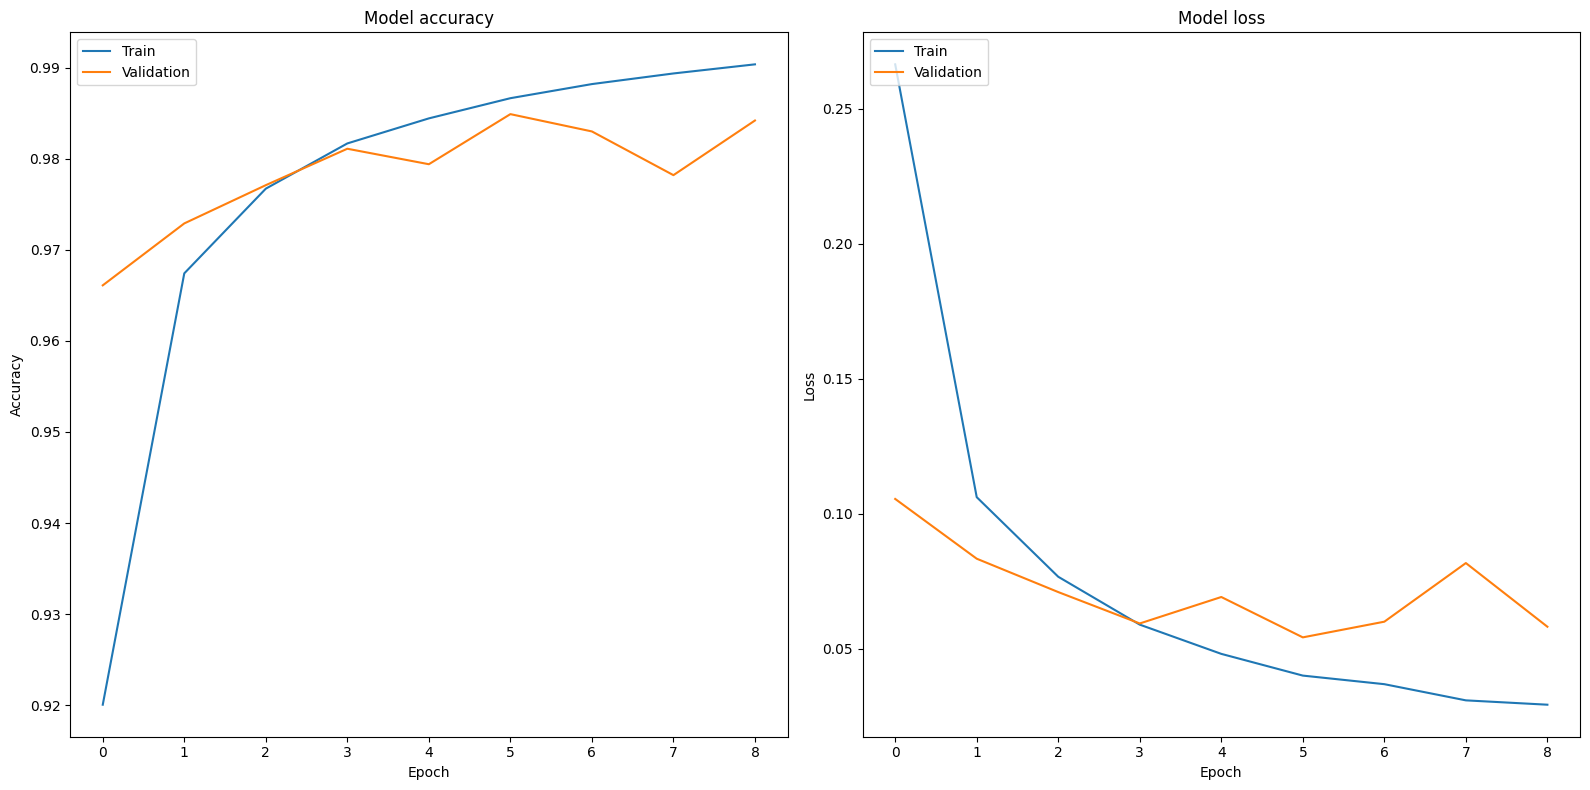

In [23]:

def plot_training_history(history):
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_training_history(history)


In [18]:
best_model = models.load_model('best_model.keras')
best_loss, best_acc = best_model.evaluate(x_test_flat, y_test, verbose=2)
print(f"Best Model Test Accuracy: {best_acc}")


313/313 - 0s - 1ms/step - accuracy: 0.9849 - loss: 0.0542
Best Model Test Accuracy: 0.9848999977111816


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


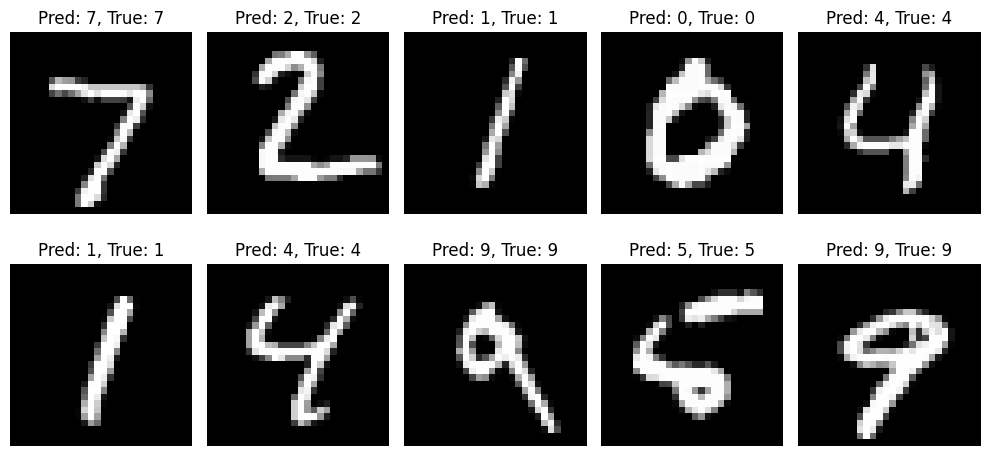

In [19]:
predictions = best_model.predict(x_test_flat)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

def display_sample_predictions(x_test, predicted_labels, true_labels):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(x_test[i], cmap='gray')
        plt.title(f"Pred: {predicted_labels[i]}, True: {true_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_sample_predictions(x_test, predicted_labels, true_labels)
